In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
sys.path.append('../..')
import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text, DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from copy import deepcopy
import imodels
import pybaobabdt
from viz import *
from ipywidgets import interactive
from ipywidgets.widgets import *




mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# look at model example

In [25]:
def plot_sim(n=50, std=1, reg_param=0, show=True):
    np.random.seed(13)

    def gt_func(X):
        return +1 * (X < 2) * (X < 1) + \
               -0 * (X < 2) * (X > 1) + \
               +1 * (X >= 2) * (X < 3) + \
               +0 * (X >= 2) * (X > 3)
    
#     def gt_func(X):
#         return 2 * X


    # data to fit
    X = np.random.uniform(0, 4, n)
    y = gt_func(X) + np.random.normal(0, 1, n) * std
    plt.plot(X, y, 'o', color=cb, ms=3, alpha=0.5, markeredgewidth=0)


    # data to plot
    X_tile = np.linspace(0, 4, 500)
    y_tile = gt_func(X_tile)
    plt.plot(X_tile, y_tile, label='Groundtruth', color=cb)


    m1 = DecisionTreeRegressor(random_state=1) #, max_leaf_nodes=4)
    m1.fit(X.reshape(-1, 1), y)
    y_pred_dt = m1.predict(X_tile.reshape(-1, 1))
    plt.plot(X_tile, y_pred_dt, ':', label='CART', color=cp)

    mshrunk = imodels.ShrunkTreeRegressor(deepcopy(m1), reg_param=reg_param)
    y_pred_shrunk = mshrunk.predict(X_tile.reshape(-1, 1))
    plt.plot(X_tile, y_pred_shrunk, ':', label='Shrunk', color=cg)


    plt.xlabel('X')
    plt.ylabel('Y')
    dvu.line_legend(adjust_text_labels=False)
    if show:
        plt.show()
    else:
        plt.savefig(f'gif/{reg_param}.svg')

#     print('dt', export_text(m1, feature_names=['X']))
#     print('dt', export_text(mshrunk.estimator_, feature_names=['X']))

# plot_sim(n=100)

interactive_plot = interactive(plot_sim,
                               n=IntSlider(value=50, min=20, max=100, step=10),
                               std=FloatSlider(value=0.5, min=0.01, max=3),
                               reg_param=(0, 1000))
output = interactive_plot.children[-1]
output.layout.height = '800px'
interactive_plot # note this can't be exported to static

interactive(children=(IntSlider(value=50, description='n', min=20, step=10), FloatSlider(value=0.5, descriptio…

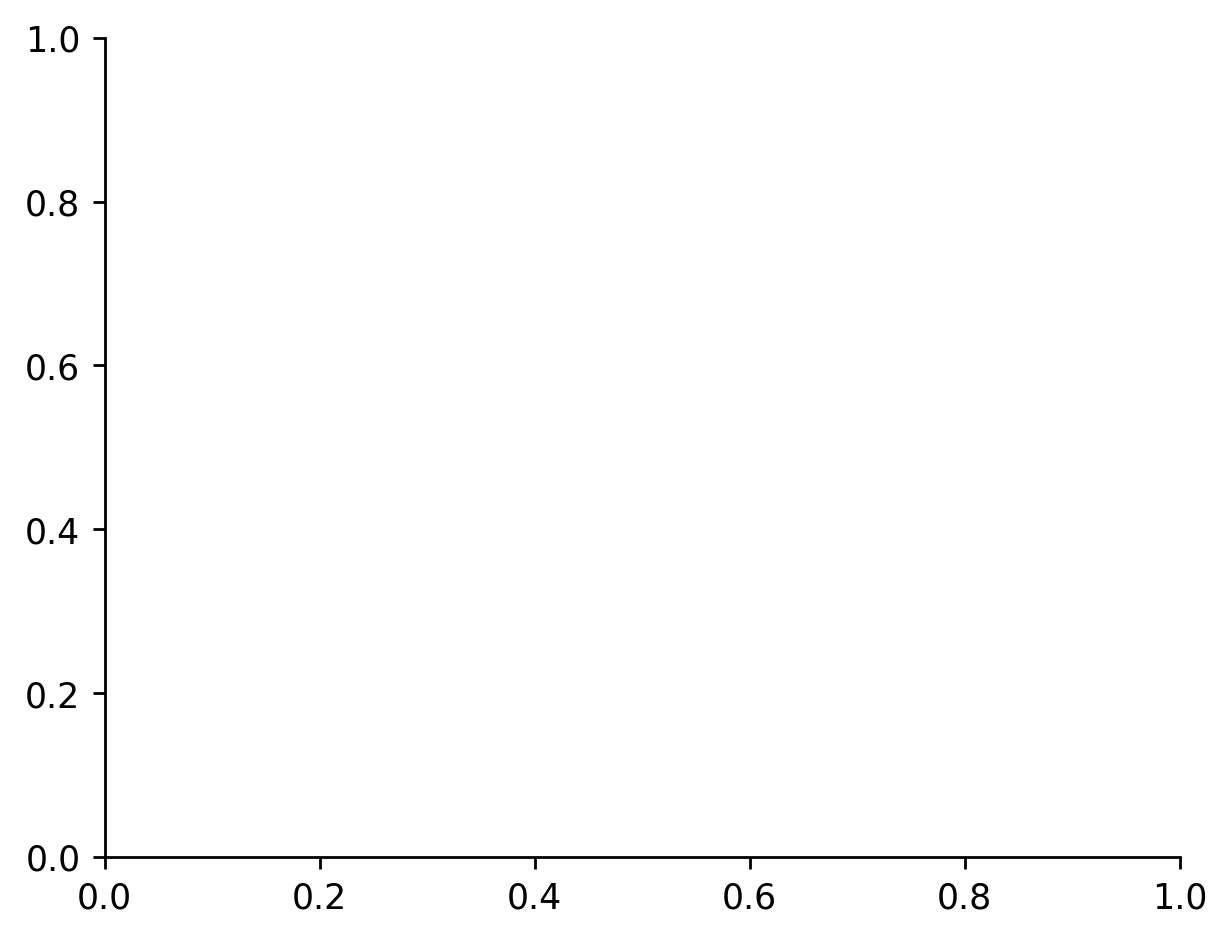

In [26]:
for reg_param in [0, 1, 5, 10, 181]:
    plot_sim(reg_param=reg_param, show=False)
    plt.cla()

In [19]:
!pwd

/Users/chandan/rules/imodels-experiments/notebooks/shrinkage


In [14]:
!mkdir gif

# try exporting to webpage
**note: ipywidgets doesn't support this properly**

In [67]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, {'manual': True}, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
embed_minimal_html('export.html', views=[interactive_plot], title='Widgets export')
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

# interactive viz
- one approach: https://github.com/JanSellner/ImageSequenceAnimation
- bokeh requires writing JS code